In [1]:
import geopandas

In [2]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,7111024,Europe,Serbia,SRB,101800.0,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,642550,Europe,Montenegro,MNE,10610.0,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1895250,Europe,Kosovo,-99,18490.0,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1218208,North America,Trinidad and Tobago,TTO,43570.0,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


In [3]:
# https://www.census.gov/geographies/mapping-files/time-series/geo/carto-boundary-file.html
# geopandas
from pathlib import Path
data = Path("cb_2018_us_state_20m") / "cb_2018_us_state_20m.shp"
states = geopandas.read_file(str(data))
states.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,24,01714934,0400000US24,24,MD,Maryland,00,25151100280,6979966958,"MULTIPOLYGON (((-76.04621 38.02553, -76.00734 ..."
1,19,01779785,0400000US19,19,IA,Iowa,00,144661267977,1084180812,"POLYGON ((-96.62187 42.77925, -96.57794 42.827..."
2,10,01779781,0400000US10,10,DE,Delaware,00,5045925646,1399985648,"POLYGON ((-75.77379 39.72220, -75.75323 39.757..."
3,39,01085497,0400000US39,39,OH,Ohio,00,105828882568,10268850702,"MULTIPOLYGON (((-82.86334 41.69369, -82.82572 ..."
4,42,01779798,0400000US42,42,PA,Pennsylvania,00,115884442321,3394589990,"POLYGON ((-80.51989 40.90666, -80.51964 40.987..."


In [4]:
import pandas as pd
dfs = pd.read_html("https://www.worldometers.info/coronavirus/country/us/")

In [5]:
df = dfs[0]
df["cases"] = df["TotalCases"]
df["deaths"] = df["TotalDeaths"]
df["recovered"] = df["TotalRecovered"]
df["active"] = df["ActiveCases"]
df.head()

,USAState,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,ActiveCases,Source,cases,deaths,recovered,active
0,New York,16900,"+1,110",150.0,36.0,NaN,16750,[source] [source] [source] [source] [source] [...,16900,150.0,NaN,16750
1,Washington,1996,NaN,95.0,NaN,124.0,1777,[source],1996,95.0,124.0,1777
2,New Jersey,1914,NaN,21.0,1.0,NaN,1893,[source] [source],1914,21.0,NaN,1893
3,California,1802,+47,35.0,1.0,6.0,1761,[source] [source],1802,35.0,6.0,1761
4,Illinois,1049,NaN,9.0,NaN,2.0,1038,[source],1049,9.0,2.0,1038


In [6]:
df = pd.merge(states, df, left_on="NAME", right_on="USAState")
df["state"] = df["USAState"]

In [7]:
pops = pd.read_html("https://simple.wikipedia.org/wiki/List_of_U.S._states_by_population")
assert len(pops) == 1
pop = pops[0]

In [8]:
pop["population"] = pop["Population estimate, July 1, 2019[2]"]

In [9]:
df = pd.merge(df, pop, left_on="state", right_on="State")

In [10]:
import numpy as np
rate = 2.4
df["density"] = np.log10(df["cases"] / (df["population"] / 1e6))# * rate
# df["density"] -= df.density.median()

In [11]:
df.columns

Index(['STATEFP', 'STATENS', 'AFFGEOID', 'GEOID', 'STUSPS', 'NAME', 'LSAD',
       'ALAND', 'AWATER', 'geometry', 'USAState', 'TotalCases', 'NewCases',
       'TotalDeaths', 'NewDeaths', 'TotalRecovered', 'ActiveCases', 'Source',
       'cases', 'deaths', 'recovered', 'active', 'state',
       'Rank in the fifty states, 2019', 'Rank in states & territories, 2010',
       'State', 'Population estimate, July 1, 2019[2]',
       'Census population, April 1, 2010[3]',
       'Percent change, 2010–2019[note 1]', 'Absolute change, 2010-2019',
       'Total seats in the U.S. House of Representatives, 2013–2023',
       'Estimated population per electoral vote, 2019[note 2]',
       'Estimated population per House seat, 2019',
       'Census population per House seat, 2010',
       'Percent of the total U.S. population, 2018[note 3]', 'population',
       'density'],
      dtype='object')

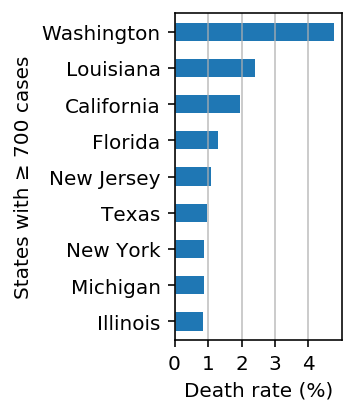

In [13]:
import matplotlib.pyplot as plt
df["deaths"].fillna(value=0, inplace=True)
df["death_rate"] = 100 * df["deaths"] / df["cases"]
df["cases_per_million"] = df["cases"] / (df["population"] / 1e6)
# df.plot(x="state", y="death_rate", kind="barh")
show = pd.DataFrame({
    "death_rate": df.death_rate,
    "state": df.state,
    "cases": df.cases,
    "cases_per_million": df.cases_per_million,
    "deaths_per_million": df.deaths / (df["population"] / 1e6),
})
show = show.sort_values(by="death_rate")
show = show[show.death_rate > 0]
num_cases = 700
s = show[show.cases >= num_cases]

w = 1.5
fig, ax = plt.subplots(figsize=(1 * w, 2 * w))
ax = s.plot.barh(x="state", y="death_rate", ax=ax)
ax.set_xlabel("Death rate (%)")
ax.set_ylabel(f"States with ≥ {num_cases} cases")
ax.grid(alpha=0.8, axis="x", which="both")
if True:
    ax.xaxis.set_major_locator(plt.FixedLocator([0, 1, 2, 3, 4]))
else:
    ax.set_xscale("log")
    ax.xaxis.set_major_locator(plt.FixedLocator([0.1, 1, 10]))
    ax.xaxis.set_minor_locator(plt.FixedLocator([0.1, 0.2, 0.5, 1, 2, 5]))
    ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: str(x)))
    ax.xaxis.set_minor_formatter(plt.FuncFormatter(lambda x, _: str(x)))
ax.legend_.remove()
# plt.savefig("state-death-rate.svg", bbox_inches="tight")

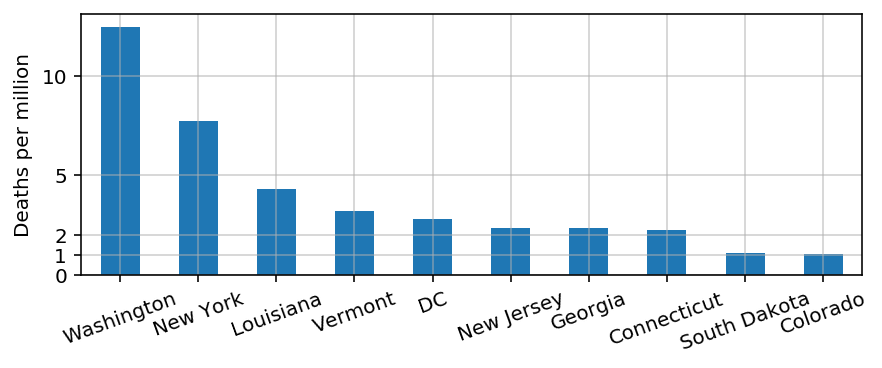

In [14]:
s = show.sort_values(by="deaths_per_million", ascending=False)
idx = s.state == "District of Columbia"
s.loc[idx, "state"] = "DC"

w = 2
fig, ax = plt.subplots(figsize=(3.5 * w, 1.2 * w))
ax = s.iloc[:10].plot.bar(x="state", y="deaths_per_million", ax=ax)
ax.set_xlabel("")
ax.set_ylabel(f"Deaths per million")
ax.grid(alpha=0.6)
ax.set_xticklabels(ax.get_xticklabels(), rotation=20)
ax.yaxis.set_major_locator(plt.FixedLocator([0, 1, 2, 5, 10, 20, 50]))
ax.legend_.remove()
# plt.savefig("state-deaths.svg", bbox_inches="tight")

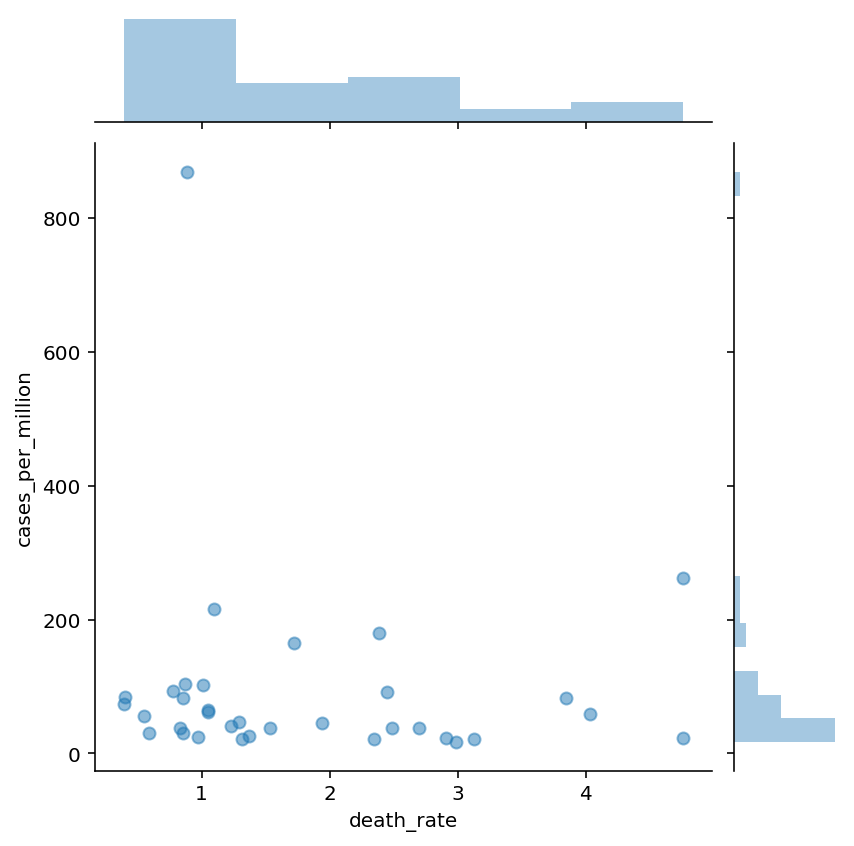

In [15]:
import seaborn as sns
sns.jointplot(
    data=show,
    y="cases_per_million",
    x="death_rate",
    alpha=0.5,
#     kind="kde",
)

In [ ]:
ax = show.plot.hist(x="state", y="death_rate", bins=30)
ax.set_ylabel("Death rate (%)")
ax.grid(alpha=0.5, axis="x")

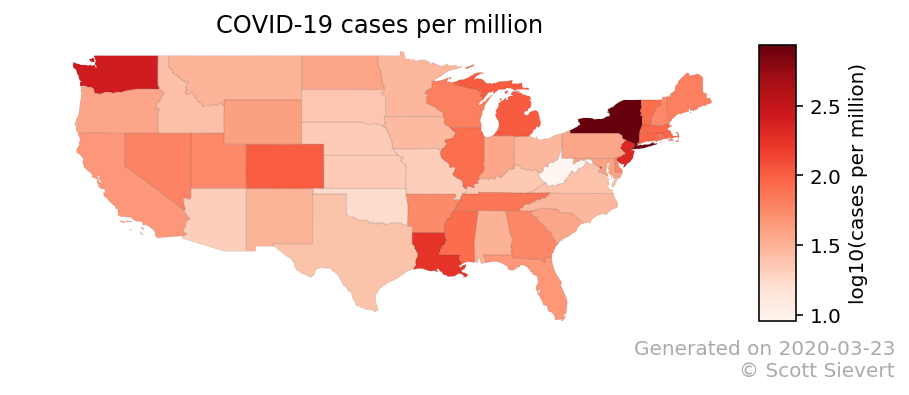

In [17]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.pyplot as plt
# df["geometry"] = df["geometry_x"]
lim = max(df.density.max(), -df.density.min())

w = 3.5
fig, ax = plt.subplots(figsize=(2 * w, w))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
ax = df.plot(
    column="density",
    cmap="Reds",
    vmin=df.density.min(),
    vmax=df.density.max(),
    legend=True,
    legend_kwds={
        'label': "log10(cases per million)",
    },
    ax=ax,
    cax=cax,
)
df.boundary.plot(ax=ax, color="#000000", alpha=0.08, linewidth=0.5)
ax.set_xlim(-130, -64)
ax.set_ylim(25, 50)
ax.set_title("COVID-19 cases per million")
ax.xaxis.set_major_formatter(plt.FixedFormatter([]))
ax.yaxis.set_major_formatter(plt.FixedFormatter([]))
ax.axis('off')
from datetime import datetime
x, y = -74, 22
ax.text(x, y, "Generated on {}".format(datetime.now().isoformat()[:10]), color="#" + "a" * 6)
ax.text(x + 9.5, y - 2, "© Scott Sievert", color="#" + "a" * 6)

plt.savefig("us-states.svg", bbox_inches="tight")

In [ ]:
df.density.min()

* CA, NY, WA, IL
* FL
* Lousiana
* IL
* MN, WI